In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Data Collection and analysis

In [225]:
# loading the data from csv file to a Pandas DataFrame
insurance_dataset = pd.read_csv('C:\\Users\\Asus\\Downloads\\insurance.csv')

In [226]:
# first 5 rows of the dataframe
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [227]:
# number of rows and columns
insurance_dataset.shape

(1338, 7)

In [228]:
# getting some informations about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [229]:
# checking for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [230]:
# statistical Measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


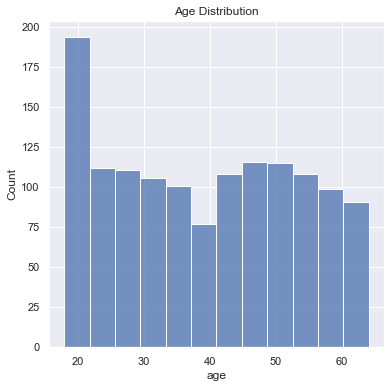

In [231]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.histplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

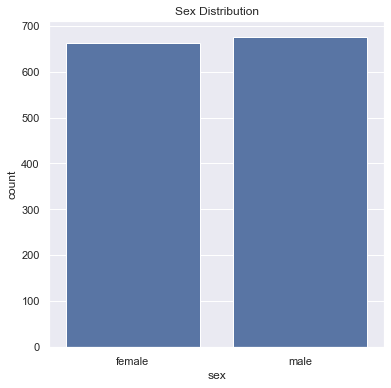

In [232]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [233]:
insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

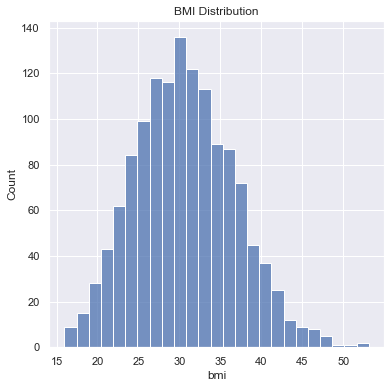

In [234]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.histplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

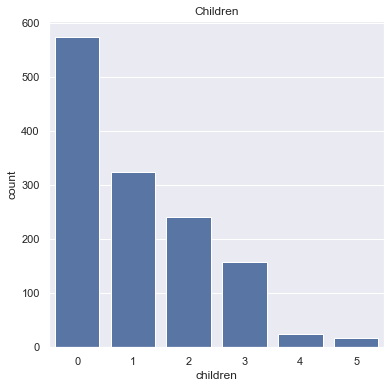

In [235]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)
plt.title('Children')
plt.show()

In [236]:
insurance_dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

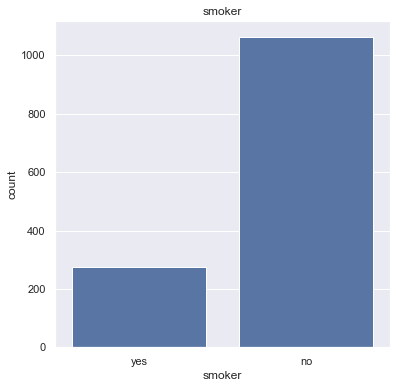

In [237]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('smoker')
plt.show()

In [238]:
insurance_dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

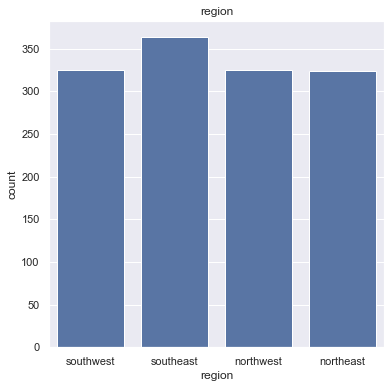

In [239]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset)
plt.title('region')
plt.show()

In [240]:
insurance_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

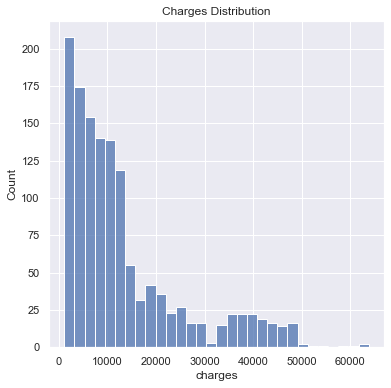

In [241]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.histplot(insurance_dataset['charges'])
plt.title('Charges Distribution')
plt.show()

# Data Preprocessing

In [242]:
#encoding sex column
insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)

3 # encoding 'smoker' column
insurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

# Splitting the features and target

In [243]:
X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']

In [244]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [245]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


# Splitting the data into training and test data

In [246]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [247]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


# Model Training
#Linear Regression Model

In [248]:
#loading the linear regression model
regressor=LinearRegression()

In [249]:
regressor.fit(X_train,Y_train)

LinearRegression()

# Model Evaluation

In [250]:
#prediction on training data
training_data_prediction=regressor.predict(X_train)

In [251]:
#R squared value
r2_train=r2_score(Y_train,training_data_prediction)
print('R squared value:',r2_train)

R squared value: 0.751505643411174


In [252]:
test_data_prediction=regressor.predict(X_test)

In [254]:
# R squared value
r2_test = r2_score(Y_test, test_data_prediction)
print('R squared value : ', r2_test)

R squared value :  0.7447273869684077


# Building a predictive system

In [255]:
warnings.filterwarnings('ignore')
input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[3760.0805765]
The insurance cost is USD  3760.0805764960496


# Using SVM(Regression)

In [256]:
X = insurance_dataset.drop(columns='charges', axis=1).values
Y = insurance_dataset['charges'].values.reshape(-1,1)

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [257]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [258]:
X_train_scaled = StandardScaler().fit_transform(X_train)
Y_train_scaled = StandardScaler().fit_transform(Y_train)
X_test_scaled = StandardScaler().fit_transform(X_test)
Y_test_scaled = StandardScaler().fit_transform(Y_test)

svr = SVR()

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters =  { 'kernel' : ['rbf', 'sigmoid'],
                 'gamma' : [0.001, 0.01, 0.1, 1, 'scale'],
                 'tol' : [0.0001],
                 'C': [0.001, 0.01, 0.1, 1, 10, 100] }
svr_grid = GridSearchCV(estimator=svr, param_grid=parameters, cv=10, verbose=4, n_jobs=-1)
svr_grid.fit(X_train_scaled, y_train_scaled.ravel())

Fitting 10 folds for each of 60 candidates, totalling 600 fits


GridSearchCV(cv=10, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 'scale'],
                         'kernel': ['rbf', 'sigmoid'], 'tol': [0.0001]},
             verbose=4)

In [ ]:
svr = SVR(C=10, gamma=0.1, tol=0.0001)
svr.fit(X_train_scaled, y_train_scaled.ravel())

In [ ]:
from sklearn.metrics import r2_score

cv_svr = svr_grid.best_score_

y_pred_svr_train = svr.predict(X_train_scaled)
r2_score_svr_train = r2_score(Y_train_scaled, y_pred_svr_train)

print('R squared value(test):',r2_score_svr_train)

In [ ]:
y_pred_svr_test = svr.predict(X_test_scaled)
r2_score_svr_test = r2_score(y_test_scaled, y_pred_svr_test)
print('R squared value(test):',r2_score_svr_test)

# Using RandomForest Regressor

In [ ]:
X= insurance_dataset.drop('charges',axis=1).values
Y= insurance_dataset['charges'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=2)

print('Size of X_train: ', X_train.shape)
print('Size of y_train: ', Y_train.shape)
print('Size of X_test: ', X_test.shape)
print('Size of Y_test : ', Y_test.shape)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=7,
                       n_estimators=1200)
rf_reg.fit(X_train,Y_train.ravel())

In [ ]:
y_pred_rf_train_ = rf_reg.predict(X_train)
r2_score_rf_train = r2_score(Y_train, y_pred_rf_train_)

y_pred_rf_test_ = rf_reg.predict(X_test)
r2_score_rf_test= r2_score(Y_test, y_pred_rf_test_)

print('R2 score (train) : {0:.3f}'.format(r2_score_rf_train_))
print('R2 score (test) : {0:.3f}'.format(r2_score_rf_test_))

In [ ]:
models = [('Linear Regression',r2_train, r2_test),
          ('Support Vector Regression',r2_score_svr_train, r2_score_svr_test),
          ('Random Forest Regression', r2_score_rf_train, r2_score_rf_test),   
         ]

In [ ]:
predict = pd.DataFrame(data = models, columns=['Model', 'R2_Score(training)', 'R2_Score(test)'])
predict

In [ ]:
plt.figure(figsize=(12,7))
predict.sort_values(by=['R2_Score(test)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(test)', y='Model',data = predict, palette='Reds')
plt.xlabel('R2_Score(test)')
plt.ylabel('Model')
plt.show()